In [1]:
#conda install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import re

In [2]:
dataset = pd.read_csv("train_1.csv").fillna(0)
dataset.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [3]:
#print(dataset.info())
dataset.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,...,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05
mean,1.024882e+03,1.031234e+03,9.731234e+02,1.003791e+03,1.044342e+03,1.108086e+03,1.062624e+03,1.026181e+03,1.030808e+03,1.022828e+03,...,1.357067e+03,1.343449e+03,1.362474e+03,1.484413e+03,1.634242e+03,1.635483e+03,1.590915e+03,1.639885e+03,1.431160e+03,1.442972e+03
std,6.735340e+04,6.868551e+04,6.449417e+04,6.720994e+04,6.834087e+04,7.464303e+04,7.016081e+04,6.325117e+04,6.632223e+04,6.689720e+04,...,8.460264e+04,7.636701e+04,8.384845e+04,8.638560e+04,9.661396e+04,9.113984e+04,9.064050e+04,8.894637e+04,8.052685e+04,8.766977e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,...,1.800000e+01,1.900000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.900000e+01,2.000000e+01,2.000000e+01,1.900000e+01,1.800000e+01
50%,5.800000e+01,5.700000e+01,5.400000e+01,5.500000e+01,5.900000e+01,5.900000e+01,6.100000e+01,6.300000e+01,6.100000e+01,5.900000e+01,...,1.370000e+02,1.330000e+02,1.220000e+02,1.330000e+02,1.460000e+02,1.490000e+02,1.490000e+02,1.470000e+02,1.420000e+02,1.250000e+02
75%,4.090000e+02,4.060000e+02,3.980000e+02,3.880000e+02,4.280000e+02,4.340000e+02,4.310000e+02,4.360000e+02,4.350000e+02,4.300000e+02,...,5.850000e+02,5.770000e+02,5.510000e+02,6.040000e+02,6.340000e+02,6.450000e+02,6.300000e+02,6.260000e+02,6.120000e+02,5.420000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [4]:
def get_lang(Page):
    res = re.search('[a-z][a-z].wikipedia.org',Page)
    if res:
        return res[0][0:2]           
    
   
    return 'no_lang'

dataset['lang'] = dataset.Page.map(get_lang)


print("\nArticle count as per Language : \n", Counter(dataset.lang))


Article count as per Language : 
 Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'no_lang': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [5]:
lang_set={}
lang_set['en'] = dataset[dataset.lang=='en'].iloc[:,0:-1]
lang_set['ja'] = dataset[dataset.lang=='ja'].iloc[:,0:-1]
lang_set['de'] = dataset[dataset.lang=='de'].iloc[:,0:-1]
lang_set['fr'] = dataset[dataset.lang=='fr'].iloc[:,0:-1]
lang_set['zh'] = dataset[dataset.lang=='zh'].iloc[:,0:-1]
lang_set['zh'] = dataset[dataset.lang=='zh'].iloc[:,0:-1]
lang_set['es'] = dataset[dataset.lang=='es'].iloc[:,0:-1]
lang_set['no_lang'] = dataset[dataset.lang=='no_lang'].iloc[:,0:-1]

for key in lang_set:
    print("KEY : ", lang_set[key],"\n")

KEY :                                                       Page  2015-07-01  \
8357            !vote_en.wikipedia.org_desktop_all-agents         3.0   
8358    "Awaken,_My_Love!"_en.wikipedia.org_desktop_al...         0.0   
8359    "European_Society_for_Clinical_Investigation"_...         0.0   
8360    "Weird_Al"_Yankovic_en.wikipedia.org_desktop_a...      2403.0   
8361       100_metres_en.wikipedia.org_desktop_all-agents       982.0   
...                                                   ...         ...   
113946  Zikanyrops_sparsa_en.wikipedia.org_all-access_...         1.0   
113947  Zillur_Rahman_John_en.wikipedia.org_all-access...         7.0   
113948   Zitadelle_en.wikipedia.org_all-access_all-agents        10.0   
113949  Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...         0.0   
113950  Zurich.minds_en.wikipedia.org_all-access_all-a...         8.0   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
8357           4.0         7.0         4.0    

In [6]:

total_view = {} 
for key in lang_set:
    total_view[key] = lang_set[key].iloc[:, 1:-1].sum(axis=0) / lang_set[key].shape[0]


for key in lang_set:
    print("KEY : ", key)
    print("\nTotal_Value KEY : \n", total_view[key])

KEY :  en

Total_Value KEY : 
 2015-07-01    3513.862203
2015-07-02    3502.511407
2015-07-03    3325.357889
2015-07-04    3462.054256
2015-07-05    3575.520035
                 ...     
2016-12-26    5770.371661
2016-12-27    6040.680728
2016-12-28    5860.227559
2016-12-29    6245.127510
2016-12-30    5201.783018
Length: 549, dtype: float64
KEY :  ja

Total_Value KEY : 
 2015-07-01    580.647056
2015-07-02    666.672801
2015-07-03    602.289805
2015-07-04    756.509177
2015-07-05    725.720914
                 ...    
2016-12-26    779.114728
2016-12-27    789.158680
2016-12-28    790.500465
2016-12-29    865.483236
2016-12-30    952.018354
Length: 549, dtype: float64
KEY :  de

Total_Value KEY : 
 2015-07-01     714.968405
2015-07-02     705.229741
2015-07-03     676.877231
2015-07-04     621.145145
2015-07-05     722.076185
                 ...     
2016-12-26    1206.478029
2016-12-27    1085.095379
2016-12-28    1032.640804
2016-12-29     994.657141
2016-12-30     949.265649
Leng

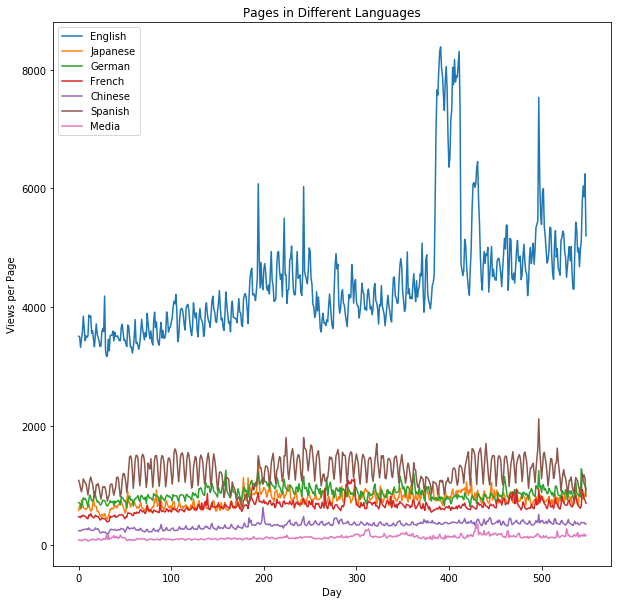

In [7]:

days = [r for r in range(total_view['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'no_lang':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in total_view:
    plt.plot(days,total_view[key],label = labels[key] )
    
plt.legend()
plt.show()

In [8]:
#conda install statsmodels

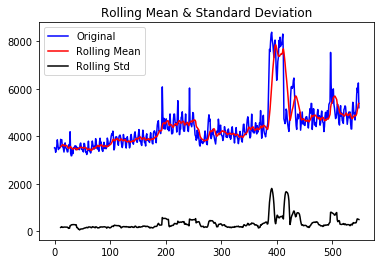

(-2.2452007483736383, 0.19025089451089527, 14, 534, {'1%': -3.4426552678216003, '5%': -2.8669676577777548, '10%': -2.569660749624767}, 7621.413812984315)
ADF Stastistic: -2.245201
p-value: 0.190251
The graph is non stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [10]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=12,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x.values, color='blue',label='Original')
    mean = plt.plot(rolmean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolstd.values, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print(result)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
test_stationarity(total_view['en'])

In [11]:
import matplotlib.pylab as plt

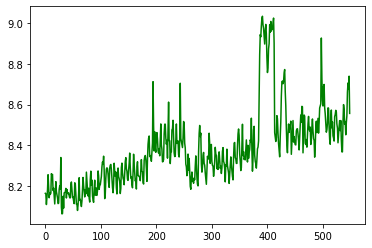

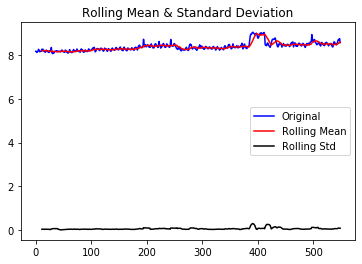

ADF Stastistic: -2.028928
p-value: 0.274035
The graph is non stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [14]:
ts_log = np.log(total_view['en'])
plt.plot(ts_log.values,color="green")
plt.show()

test_stationarity(ts_log)

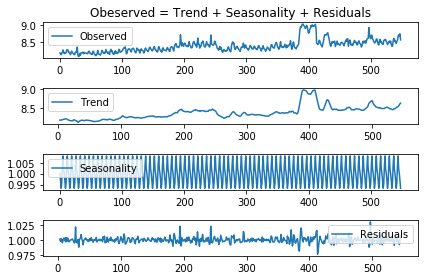

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log.values, model='multiplicative',freq = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.title('Obeserved = Trend + Seasonality + Residuals')
plt.plot(ts_log.values,label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


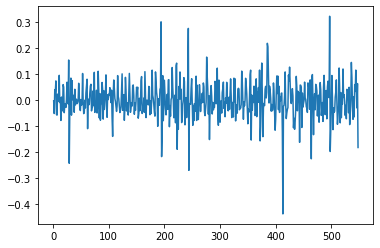

In [16]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff.values)
plt.show()

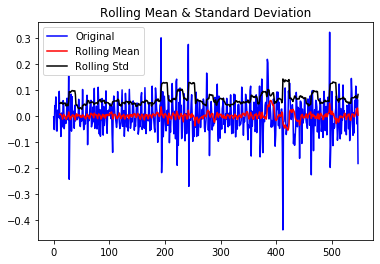

ADF Stastistic: -8.130271
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [18]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

/home/anand/miniconda3/envs/myDjangoEnv/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


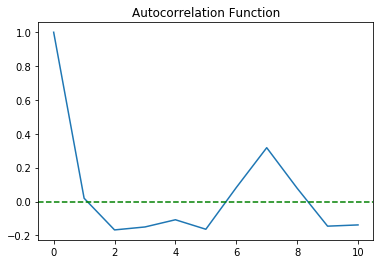

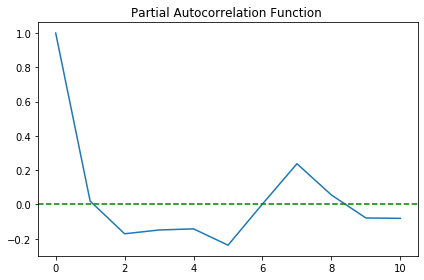

In [19]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(1,1,1)

plt.plot(lag_acf)
#print(lag_acf[0.5])

plt.axhline(y=0,linestyle='--',color='g')
plt.title('Autocorrelation Function')
plt.show()

#Plot PACF:
plt.subplot(1,1,1)
plt.plot(lag_pacf)

plt.axhline(y=0,linestyle='--',color='green')
plt.title('Partial Autocorrelation Function ')
plt.tight_layout()
plt.show()

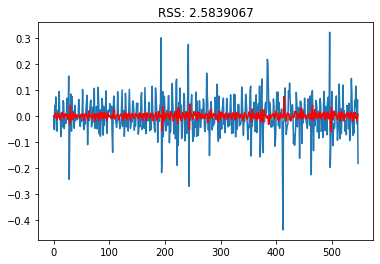

In [31]:
import warnings
warnings.filterwarnings("ignore")


model = ARIMA(ts_log.values, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff.values)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff.values)**2))
plt.show()

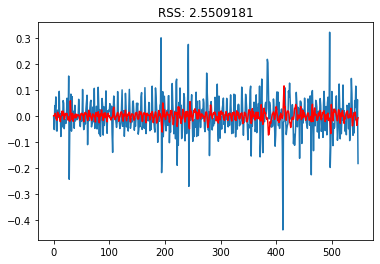

In [32]:
model = ARIMA(ts_log.values, order=(0,1,2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff.values)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff.values)**2))
plt.show()

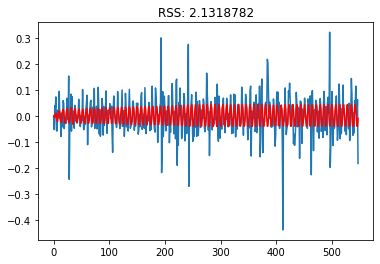

In [33]:
model = ARIMA(ts_log.values, order=(2,1,2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff.values)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff.values)**2))
plt.show()

In [34]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  548
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 741.869
Method:                       css-mle   S.D. of innovations              0.062
Date:                Sat, 28 Sep 2019   AIC                          -1471.739
Time:                        02:30:45   BIC                          -1445.901
Sample:                             1   HQIC                         -1461.640
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.003      0.304      0.762      -0.004       0.006
ar.L1.D.y      1.2473      0.001   1594.350      0.000       1.246       1.249
ar.L2.D.y     -1.0000        nan        nan        n

In [35]:
size = int(len(ts_log)-100)
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit(disp=0)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
    #error = mean_squared_error(np.exp(yhat), np.exp(obs))
    #print('mean_squared_error : ', error)
print('\n Means Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')


Printing Predicted vs Expected Values...


predicted = 4711.980397,   expected = 4518.616185,   error = 4.279279  %
predicted = 4598.531927,   expected = 4461.695661,   error = 3.066912  %
predicted = 4545.847279,   expected = 4456.174589,   error = 2.012324  %
predicted = 4540.171985,   expected = 4775.697611,   error = 4.931753  %
predicted = 4830.782611,   expected = 4818.150572,   error = 0.262176  %
predicted = 4869.846032,   expected = 4824.929940,   error = 0.930917  %
predicted = 4876.101176,   expected = 4704.449021,   error = 3.648720  %
predicted = 4766.951603,   expected = 4559.138958,   error = 4.558156  %
predicted = 4634.348962,   expected = 4347.536502,   error = 6.597126  %
predicted = 4439.972298,   expected = 4645.420275,   error = 4.422592  %
predicted = 4711.544851,   expected = 4904.789282,   error = 3.939913  %
predicted = 4947.160795,   expected = 5161.465903,   error = 4.152020  %
predicted = 5178.931993,   expected = 4982.463373,   error = 3.943202  %
predicte

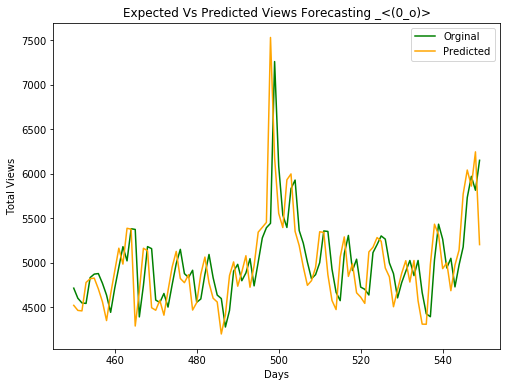

In [36]:
plt.figure(figsize=(8, 6))
test_day = [t+450
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting _<(0_o)>')
plt.xlabel('Days')
plt.ylabel('Total Views')
plt.legend(labels)
plt.show()

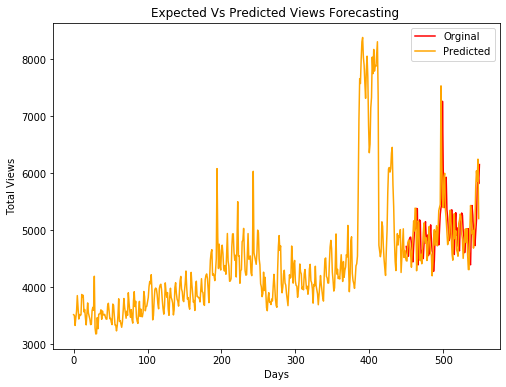

In [37]:
plt.figure(figsize=(8, 6))
test_day = [t+450
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'red')
plt.plot(days, total_view['en'], color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting ')
plt.xlabel('Days')
plt.ylabel('Total Views')
plt.legend(labels)
plt.show()


In [38]:
npages = 5
top_pages = {}
key = 'en'
print(key)
sum_set = pd.DataFrame(lang_set[key][['Page']])
sum_set['total'] = lang_set[key].sum(axis=1)
sum_set = sum_set.sort_values('total',ascending=False)
print(sum_set.head(5))
top_pages[key] = sum_set.index[0]
print('\n')

en
                                                    Page         total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  1.206618e+10
9774       Main_Page_en.wikipedia.org_desktop_all-agents  8.774497e+09
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.153985e+09
39180  Special:Search_en.wikipedia.org_all-access_all...  1.304079e+09
10403  Special:Search_en.wikipedia.org_desktop_all-ag...  1.011848e+09




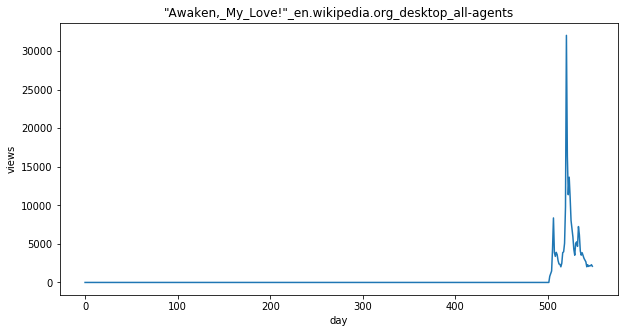

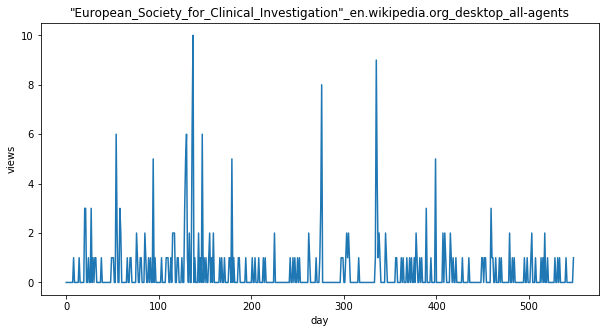

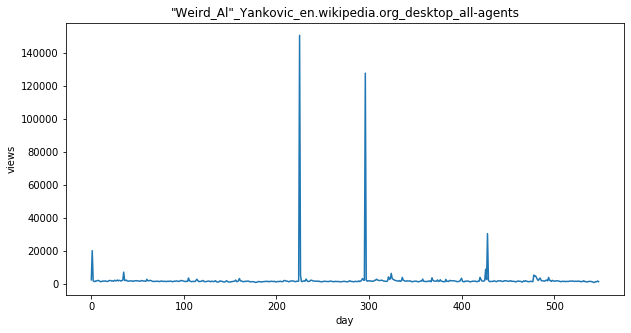

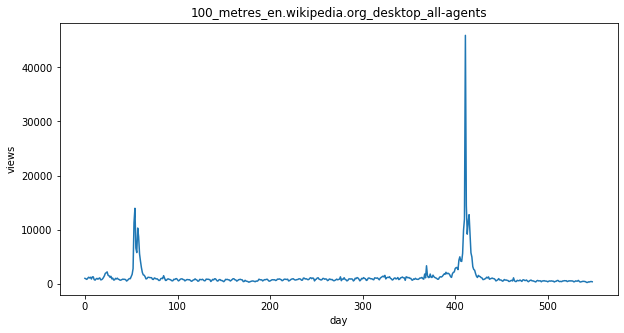

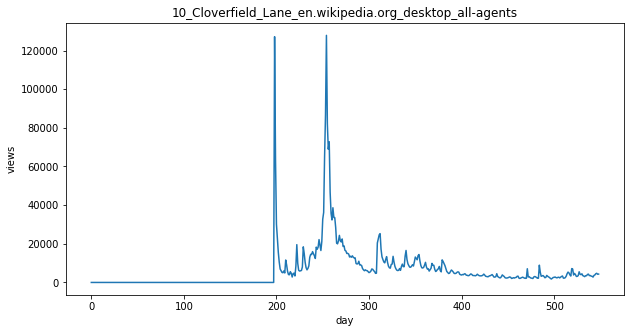

In [39]:
def plot_entry(key,idx):
    data = lang_set[key].iloc[idx,1:-1]
    fig = plt.figure(1,figsize=(10,5))
    plt.plot(days,data)
    plt.xlabel('day')
    plt.ylabel('views')
    plt.title(dataset.iloc[lang_set[key].index[idx],0])
    
    plt.show()
    
idx = [1, 2, 3, 4, 5]
for i in idx:
    plot_entry('en',i)

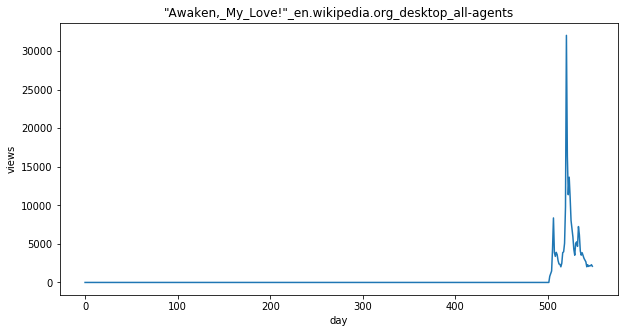

"Awaken,_My_Love!"_en.wikipedia.org_desktop_all-agents
2016-12-26    2074
2016-12-27    2175
2016-12-28    2156
2016-12-29    2302
2016-12-30    2098
Name: 8358, dtype: object


In [40]:
data = lang_set['en'].iloc[1,1:-1]
fig = plt.figure(1,figsize=(10,5))
plt.plot(days,data)
plt.xlabel('day')
plt.ylabel('views')
plt.title(dataset.iloc[lang_set['en'].index[1],0])
plt.show()

print(dataset.iloc[lang_set['en'].index[1],0])
print(data.tail())

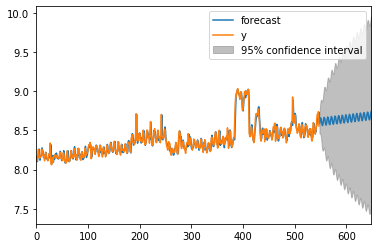

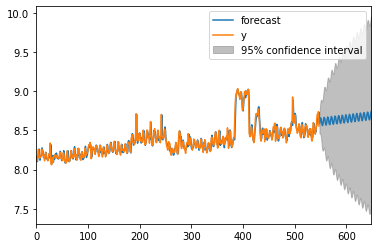

In [41]:

results_ARIMA.plot_predict(1,649)